change the data into ethical /unhetical professions

add one hot encoding for all columns 
remove badges

In [14]:
import pandas as pd 
import numpy as np 

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import shap

In [3]:
data = pd.read_csv("pokemon_data.csv")

In [4]:
data.drop("ID", axis=1, inplace=True)

In [5]:
cols = ['City', 'Economic Status']

df_processed = pd.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=cols)

In [6]:
df_processed["Average Pokemon Level"] = df_processed["Average Pokemon Level"] > 70 # according to reddit

In [7]:
df_processed["Average Pokemon Level"].value_counts(normalize=True)

False    0.696671
True     0.303329
Name: Average Pokemon Level, dtype: float64

In [8]:
y = df_processed["Average Pokemon Level"]
X = df_processed.drop("Average Pokemon Level", axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
df_processed

,Age,Average Pokemon Level,Criminal Record,Win Ratio,Debt to Kanto,Charity Participation,Team Rocket,Nice,Qualified,City_Celadon City,...,City_Fuchsia City,City_Lavender Town,City_Pallet Town,City_Pewter City,City_Saffron City,City_Vermilion City,City_Viridian City,Economic Status_High,Economic Status_Low,Economic Status_Middle
0,27,False,0,51,24511,1,0.0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,55,False,1,53,177516,1,1.0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,14,True,0,76,85695,1,0.0,1,1,0,...,0,0,1,0,0,0,0,1,0,0
3,41,False,0,27,39739,1,0.0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,15,False,1,51,126923,0,1.0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4050,48,False,1,33,256814,0,1.0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4051,31,False,1,78,172509,1,1.0,1,1,0,...,1,0,0,0,0,0,0,0,1,0
4052,10,False,1,54,41206,1,1.0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4053,63,False,1,43,278146,0,1.0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [11]:
scaler = ColumnTransformer([("scaler", StandardScaler(), ["Age","Win Ratio", "Debt to Kanto"])], remainder="passthrough")

tree_model = Pipeline(steps=[
    ("scaler", scaler),
    ("tree", DecisionTreeClassifier())
])

tree_model.fit(X_train, y_train)
X_train_scaled = tree_model["scaler"].transform(X_train)
X_test_scaled = tree_model["scaler"].transform(X_test)
tree_y_pred = tree_model.predict(X_test)

In [12]:
tree_accuracy = accuracy_score(y_test, tree_y_pred)
tree_accuracy

0.5869297163995068

In [15]:
forest = RandomForestClassifier(max_depth = 5, random_state=23, n_jobs=-1, n_estimators=20)
forest.fit(X_train, y_train)
forest_y_pred = forest.predict(X_test)
forest_accuracy = accuracy_score(y_test, forest_y_pred)
forest_accuracy

0.7003699136868065

In [14]:
scaler = ColumnTransformer([("scaler", StandardScaler(), ["Age","Win Ratio", "Debt to Kanto"])], remainder="passthrough")

logistic_model = Pipeline(steps=[
    ("scaler", scaler),
    ("logi", LogisticRegression(max_iter=5000, penalty="l2", C=0.8497534359086438, tol=1e-4, solver="saga"))
])

# Fit the model
logistic_model.fit(X_train, y_train)
# Transform the data
X_train_scaled = logistic_model["scaler"].transform(X_train)
X_test_scaled = logistic_model["scaler"].transform(X_test)
# Predictions
log_y_pred = logistic_model.predict(X_test)
log_y_prob = logistic_model.predict_proba(X_test)[:, 1]

In [15]:

log_accuracy = accuracy_score(y_test, log_y_pred)
log_accuracy

0.7003699136868065

using the shap library to see which are the features that influence decisions the most


In [16]:
explainer = shap.Explainer(logistic_model["logi"], X_train_scaled, feature_names=X_train.columns)
shap_values_log = explainer(X_test_scaled)

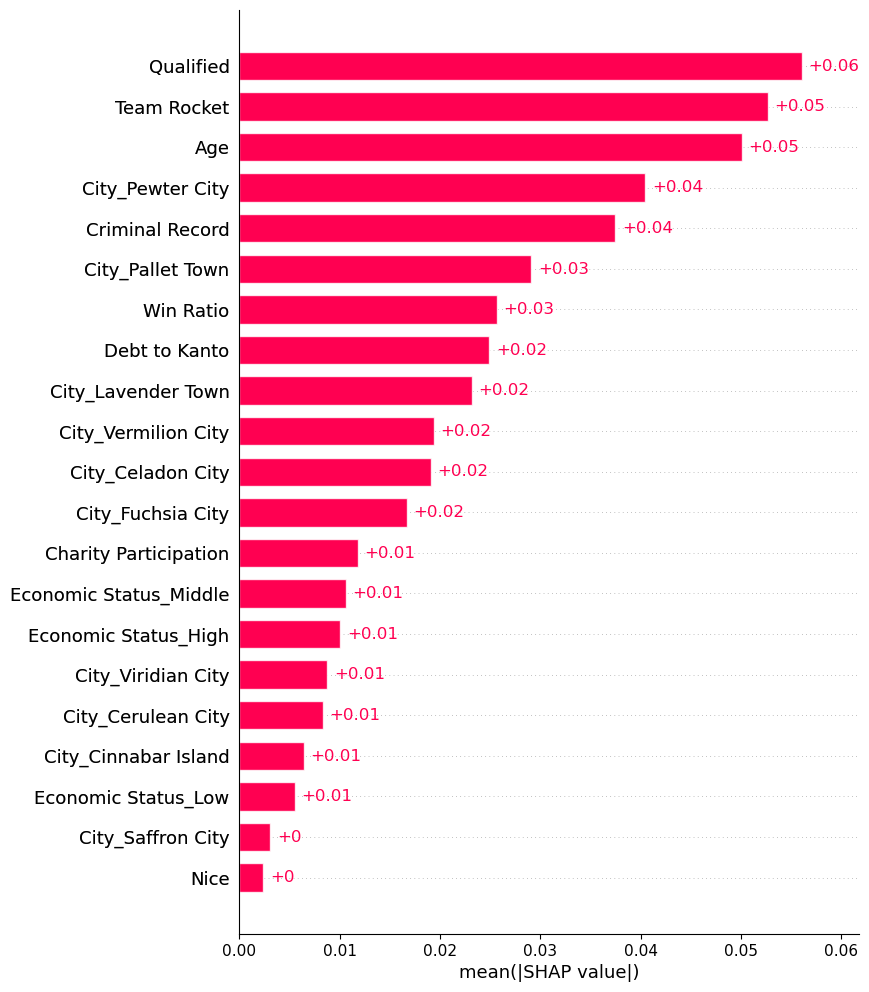

In [17]:
shap.plots.bar(shap_values_log, max_display=33)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


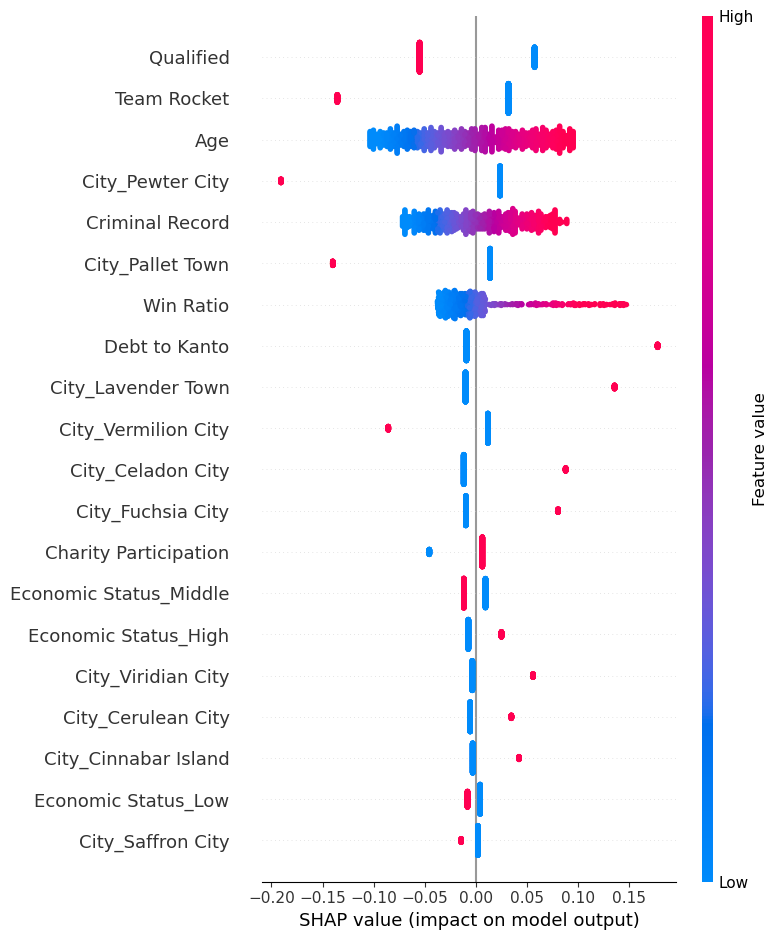

In [18]:
shap.summary_plot(shap_values_log, X_test_scaled)